# Programiranje 3: Februar 2021 



### Uputstva

- Ispit traje 90 min
- Ovu svesku je potrebno preimenovati tako da naziv bude u formatu: Prezime_Ime_Indeks (izbegavati naša slova u imenu i prezimenu)
- Dozvoljeno je korišćenje samo onih materijala koji se nalaze u folderu P3 Feb 2021 na desktop-u 
- Nije dozvoljeno korišćenje Interneta, niti korišćenje pomoćnih materijala u elektronskom, papirnom, ili bilo kom drugom obliku
- Strogo je zabranjeno iznošenje, fotografisanje ili umnožavanje zadatka na bilo koji način; povreda ovog pravila se strogo kažnjava
- Preporučuje se često snimanje (Save) onoga što je urađeno, kako u slučaju problema sa računarom, nestankom struje i sl. ne bi bilo izgubljeno ono što je uradjeno
- Nakon završenog ispita treba ostaviti otvoreno razvojno okruženje (dakle, ne zatvarati ga)
- Na pitanja tipa "Kada će, otprilike, biti objavljeni rezultati?" u ovom trenutku nije moguće odgovoriti – čim pregledanje bude završeno, rezultati će biti objavljeni na sajtu predmeta i tom prilikom će biti poznat i termin za uvid u radove.

### O ispitnom zadatku

U nastavku su date instrukcije za učitavanje skupa podataka koji je predmet analize u okviru ovog ispitnog zadatka. <br> Za svaki zahtev ili grupu zahteva zadatka je naveden broj poena koji nosi.<br> Prva grupa zahteva se odnosi na pripremu podataka za analizu i u tom smislu predstavlja preduslov za kasnije zahteve zadatka. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

### 1. Učitavanje i priprema podataka (ukupno 20p)

#### 1.1 Učitatiti podatke iz fajla online_retail.csv i kreirati DataFrame koji će biti korišćen u daljem radu

Napomena: ukoliko prilikom učitavanja podataka dobijete *utf-8 decode error*, postavite, u funkciji za učitavanje podataka, vrednost argumenta ``encoding`` na "latin1".

In [2]:
retail = pd.read_csv(Path.cwd() / 'Online_Retail.csv')

In [3]:
retail.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [4]:
retail.drop(columns='Unnamed: 0', inplace=True)

#### 1.2 Odrediti broj redova i kolona u kreiranom DataFrame-u, kao i tipove podataka atributa (kolona)   

In [5]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#### 1.3 Očistiti podatke tako da ostanu samo opservacije (redovi) sa smislenim vrednostima atributa (kolona)

Primer besmislene vrednosti je negativna vrednost za cenu ili naručenu količinu.

In [6]:
retail.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
to_remove = retail.loc[(retail.Quantity <= 0) | (retail.UnitPrice <= 0),].index

In [8]:
len(to_remove)

11805

In [9]:
retail.drop(to_remove, axis=0, inplace=True)

In [10]:
retail.describe()

,Quantity,UnitPrice,CustomerID
count,530104.000000,530104.000000,397884.000000
mean,10.542037,3.907625,15294.423453
std,155.524124,35.915681,1713.141560
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


#### 1.4 Proveriti prisustvo nedostajućih vrednosti i obrisati sve redove koji imaju makar jednu nedostajuću vrednost

In [11]:
retail.isna().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132220
Country             0
dtype: int64

In [12]:
retail.dropna(axis=0, how='any', inplace=True)

In [13]:
retail.isna().sum().sum()

0

In [14]:
retail.shape

(397884, 8)

#### 1.5 Transformisati kolone CustomerID i InvoiceDate

Kolona ``CustomerID`` bi trebalo da bude tipa ``int``. <br>
Kolona ``InvoiceDate`` bi trebalo da bude tipa ``datetime``.

In [15]:
retail[['CustomerID', 'InvoiceDate']].sample(10)

,CustomerID,InvoiceDate
155321,16348.0,4/13/11 15:55
495229,15640.0,11/23/11 14:36
456008,12617.0,11/10/11 14:39
445930,14387.0,11/7/11 12:29
240314,15532.0,6/26/11 13:24
424695,16107.0,10/28/11 13:22
459856,12685.0,11/11/11 13:46
149804,18040.0,4/8/11 8:27
513436,14156.0,11/30/11 10:54
521281,15856.0,12/2/11 16:07


In [16]:
retail.CustomerID = pd.to_numeric(retail.CustomerID, errors='coerce', downcast='integer')
retail.InvoiceDate = pd.to_datetime(retail.InvoiceDate, errors='coerce', infer_datetime_format=True)

In [17]:
retail[['CustomerID', 'InvoiceDate']].sample(10)

,CustomerID,InvoiceDate
509454,18118,2011-11-29 11:32:00
495508,14088,2011-11-23 15:44:00
350315,15311,2011-09-21 12:56:00
113492,12748,2011-03-08 12:30:00
359895,15366,2011-09-25 15:01:00
271690,16774,2011-07-20 13:09:00
8942,17858,2010-12-05 13:08:00
427844,13822,2011-10-30 15:55:00
342301,13662,2011-09-15 12:04:00
49936,18260,2011-01-09 14:42:00


### 2. Odrediti 10 zemalja, izuzimajući Veliku Britaniju, koje su imale najveći ukupan broj poručenih artikala. <br>Prikazati na grafikonu (bar chart) ukupan broj poručenih artikala za ovih 10 zemalja. (15p)

In [18]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [19]:
tot_quantity_per_country = retail.loc[retail.Country != 'United Kingdom',].groupby('Country')['Quantity'].sum()

In [20]:
top10 = tot_quantity_per_country.sort_values(ascending=False)[:10]

In [21]:
top10

Country
Netherlands    200361
EIRE           140275
Germany        119261
France         111471
Australia       83901
Sweden          36083
Switzerland     30082
Spain           27940
Japan           26016
Belgium         23237
Name: Quantity, dtype: int64

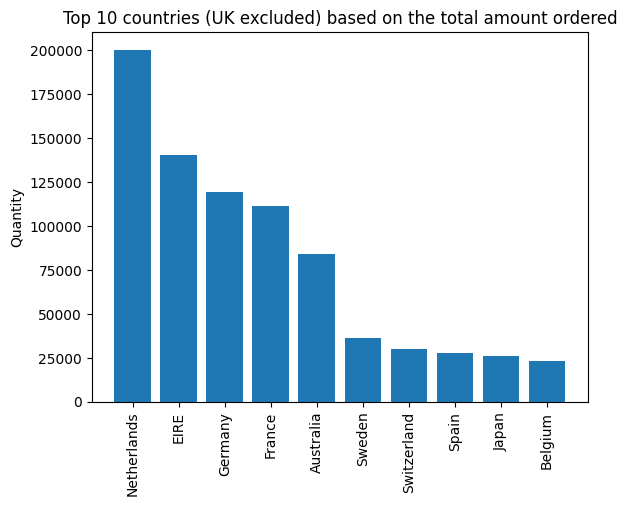

In [22]:
x = top10.index
y = top10.values

_, ax = plt.subplots()
ax.bar(x, y)
ax.tick_params(axis='x', rotation=90)
ax.set_title("Top 10 countries (UK excluded) based on the total amount ordered")
ax.set_ylabel("Quantity")

plt.show()

### 3. Među kupcima iz prethodno određenih top 10 zemalja, odrediti top 15 kupaca (CustomerID) po ukupnoj vrednosti porudžbine (10p)

Pri računanju ukupne vrednosti porudžbine, uzmite u obzir naručenu količinu (``Quantity``) i jediničnu cenu (``UnitPrice``) za svaki naručeni artikal. 

In [23]:
retail['Price'] = retail.Quantity * retail.UnitPrice

In [24]:
tot_price_per_customer = retail.loc[retail.Country.apply(lambda c: c in top10.index.tolist()),].groupby('CustomerID')['Price'].sum()

In [30]:
tot_price_per_customer.sort_values(ascending=False).head(15)

CustomerID
14646    280206.02
14911    143825.06
12415    124914.53
14156    117379.63
17404     31906.82
12753     21429.39
12471     19824.05
12731     18895.91
12678     17628.46
12681     13787.54
12621     13689.67
12540     13400.24
12477     13219.74
12536     12601.83
12682     12288.22
Name: Price, dtype: float64

### 4. Izračunati ukupan broj porudžbina u toku svakog meseca i to prikazati grafički (line chart) (15p)

In [31]:
retail['Month'] = retail.InvoiceDate.dt.month

In [33]:
order_per_month = retail.Month.value_counts().sort_index()

In [34]:
order_per_month

1     21229
2     19927
3     27175
4     22642
5     28320
6     27185
7     26825
8     27007
9     40028
10    49554
11    64531
12    43461
Name: Month, dtype: int64

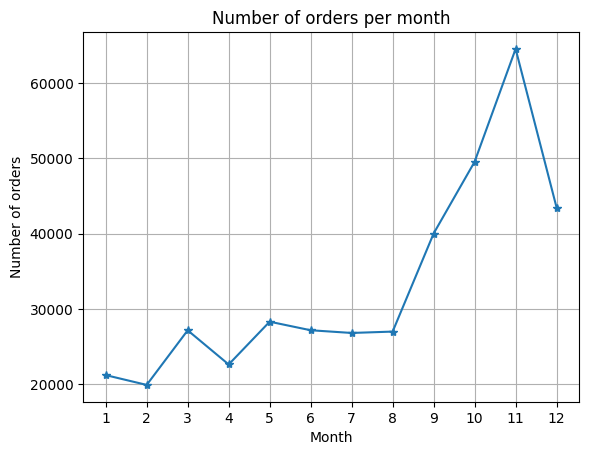

In [37]:
x = order_per_month.index
y = order_per_month.values

_,ax = plt.subplots()
ax.plot(x, y, marker='*')
ax.set_title("Number of orders per month")
ax.set_xlabel("Month")
ax.set_ylabel("Number of orders")
ax.set_xticks(range(1,13))

plt.grid(True)
plt.show()

### 5. Odrediti 10 najtraženijih artikala (u smislu naručene količine - Quantity) od strane kupaca iz Velike Britanije. Prikazati opise i naručenu količinu tih artikala (5p)

In [38]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Price,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12


In [62]:
quantity_per_article = retail.loc[retail.Country=='United Kingdom',].groupby('Description').Quantity.sum()

In [63]:
top10_articles = quantity_per_article.sort_values(ascending=False).head(10)

In [65]:
top10_articles

Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        76919
WORLD WAR 2 GLIDERS ASSTD DESIGNS     49182
JUMBO BAG RED RETROSPOT               41981
WHITE HANGING HEART T-LIGHT HOLDER    34648
ASSORTED COLOUR BIRD ORNAMENT         32727
POPCORN HOLDER                        28935
PACK OF 12 LONDON TISSUES             24337
BROCADE RING PURSE                    22711
PACK OF 72 RETROSPOT CAKE CASES       22465
Name: Quantity, dtype: int64

### 6. Odrediti broj porudzbina koje sadrže bar jedan "lunch bag" (5p)

In [71]:
lunch_bag_rows = retail.loc[retail.Description.apply(lambda d: 'lunch bag' in d.lower()),]

In [72]:
lunch_bag_rows.InvoiceNo.nunique()

3465